# Items demand utility

Import all the needed modules

In [97]:
import pandas as pd
from pandas import ExcelWriter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

Import from the statistics file the columns needed

In [11]:
excel_file = 'Reported MO.xlsx'
df = pd.read_excel(excel_file)
df['Component no'] = df['Component no'].astype(str) 

,Product no,Product name,Work Center,MO no,Op no,Seq no,Date,Status,Component no,Component name,Reserved qty,Rep qty
0,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352363,10,2,20190311,99,55144230,GX14-Top/bottom profile,4.0,4.0
1,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352363,10,4,20190311,99,55144030,GX14-Side profile,4.0,4.0
2,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352363,10,6,20190311,99,90722010,Profile for droplet catcher,33.6,33.6
3,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352407,10,2,20190311,99,55144230,GX14-Top/bottom profile,4.0,4.0
4,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352407,10,4,20190311,99,55144030,GX14-Side profile,4.0,4.0


Get dates and number of week

In [12]:
df['Date'] = pd.to_datetime(df_mos['Date'], format = '%Y%m%d')
df['Week'] = df['Date'].dt.week

Create pivot table from the df

In [14]:
pivot_df = pd.pivot_table(df, values = 'Rep qty', index = 'Component no' , columns = 'Week', aggfunc=np.sum)
pivot_df = pivot_df.fillna(0)
pivot_df = pd.DataFrame(pivot_df.to_records())

,Component no,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0645000,33.0,99.0,33.0,0.0,0.0,33.0,0.0,0.0,0.0,...,0.0,0.0,231.0,33.0,33.0,0.0,66.0,33.0,0.0,0.0
1,0645001,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,39.0,39.0,0.0,0.0,0.0,39.0
2,0645002,45.0,45.0,0.0,0.0,0.0,45.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,45.0,45.0,0.0,0.0,0.0,0.0
3,0645003,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,...,0.0,153.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0645004,116.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,58.0,58.0,58.0,0.0,0.0,0.0,0.0,0.0,58.0


Import seaborn and display distribution

SystemError: <built-in method write of _io.BufferedWriter object at 0x000002433963D468> returned a result with an error set

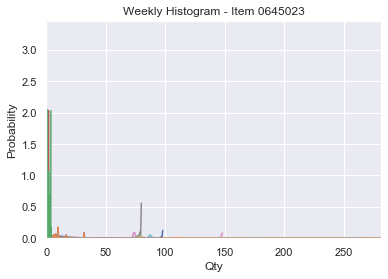

In [99]:
columns = pivot_df.columns[1:]
total_items = len(pivot_df['Component no'])

for item in range(total_items):
    item_no = pivot_df.loc[item][0]
    sns.distplot(pivot_df.loc[item, columns])
    plt.xlabel('Qty')
    plt.ylabel('Probability')
    plt.title('Weekly Histogram - Item ' + item_no)
    plt.xlim(left=0)
    plt.grid(True)
    plt.savefig('Items/'+item_no+'.png')

Output the demand to Excel

In [ ]:
name = 'Items demand based on MOs.xlsx'
writer = pd.ExcelWriter(name)
pivot_df.to_excel(writer, index = False)
writer.save()